In [668]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 



url = "C:/Users/Nimrod/Documents/GitHub/2nd_try_iron_repo/week4/marketing_customer_analysis_clean.csv"

df = pd.read_csv(url)

In [669]:
df

,unnamed:_0,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2


In [670]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(exclude='number')

df_cat = df_cat.drop(['customer', 'effective_to_date', 'response'], axis=1)

In [671]:
ordinals = df_cat[['coverage', 'education', 'vehicle_size']]
nominals = df_cat.drop(ordinals, axis=1)

In [672]:
ordinals['vehicle_size'].value_counts()

vehicle_size
Medsize    7873
Small      1966
Large      1071
Name: count, dtype: int64

In [673]:
# Get Dummies & OrdinalEncoder 
nominals = pd.get_dummies(nominals, dtype=int)

# Ordinal Encoder 
enc = OrdinalEncoder(categories=[['Basic', 'Extended', 'Premium']])

ordinals['coverage'] = enc.fit_transform(ordinals[['coverage']])

enc = OrdinalEncoder(categories=[['High School or Below', 'Bachelor', 'College', 'Master', 'Doctor']])

ordinals['education'] = enc.fit_transform(ordinals[['education']])

enc = OrdinalEncoder(categories=[['Small', 'Medsize', 'Large']])

ordinals['vehicle_size'] = enc.fit_transform(ordinals[['vehicle_size']])


C:\Users\Nimrod\AppData\Local\Temp\ipykernel_18528\1439113250.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals['coverage'] = enc.fit_transform(ordinals[['coverage']])
C:\Users\Nimrod\AppData\Local\Temp\ipykernel_18528\1439113250.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ordinals['education'] = enc.fit_transform(ordinals[['education']])
C:\Users\Nimrod\AppData\Local\Temp\ipykernel_18528\1439113250.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [674]:
cat_df = pd.concat([ordinals, nominals], axis=1)

cat_df

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Four-Door Car,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_type_A
0,0.0,2.0,1.0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,0.0,2.0,1.0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2,0.0,1.0,1.0,0,0,0,0,1,0,1,...,0,1,0,0,0,0,1,0,0,1
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
4,2.0,1.0,1.0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
10906,0.0,2.0,1.0,0,0,0,1,0,0,1,...,1,0,0,1,0,0,0,0,0,1
10907,1.0,1.0,1.0,1,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,1
10908,2.0,2.0,1.0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,1


In [675]:
df_num.columns

Index(['unnamed:_0', 'customer_lifetime_value', 'income',
       'monthly_premium_auto', 'months_since_last_claim',
       'months_since_policy_inception', 'number_of_open_complaints',
       'number_of_policies', 'total_claim_amount', 'month'],
      dtype='object')

In [676]:
df_num = df_num.drop_duplicates()

df_num.isna().any()

unnamed:_0                       False
customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
total_claim_amount               False
month                            False
dtype: bool

## Spltting & Scalling

In [677]:
# Concat cat_df + num_df 
df_pre_split = pd.concat([cat_df, df_num], axis=1)

df_pre_split

,coverage,education,vehicle_size,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,employmentstatus_Disabled,employmentstatus_Employed,...,unnamed:_0,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
0,0.0,2.0,1.0,1,0,0,0,0,0,1,...,0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,2
1,0.0,2.0,1.0,0,1,0,0,0,0,0,...,1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1
2,0.0,1.0,1.0,0,0,0,0,1,0,1,...,2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,2
3,1.0,2.0,1.0,0,0,0,1,0,0,1,...,3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,1
4,2.0,1.0,1.0,0,0,0,1,0,0,0,...,4,9025.067525,23675,117,15.149071,31,0.384256,7,707.925645,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,2.0,1.0,1.0,0,0,1,0,0,0,0,...,10905,15563.369440,0,253,15.149071,40,0.384256,7,1214.400000,1
10906,0.0,2.0,1.0,0,0,0,1,0,0,1,...,10906,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,1
10907,1.0,1.0,1.0,1,0,0,0,0,0,1,...,10907,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,2
10908,2.0,2.0,1.0,0,1,0,0,0,0,1,...,10908,11971.977650,64195,158,0.000000,27,4.000000,6,618.288849,2


In [678]:
# splitting

X = df_pre_split.drop(['total_claim_amount', 'unnamed:_0', 'month'], axis=1)
y = df_pre_split[['total_claim_amount']]

In [679]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [680]:
# past split scaling 

scaler = PowerTransformer()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)



## Apply linear regression.


In [681]:
lm = LinearRegression()
model = lm.fit(X_train, y_train)



In [682]:
model.coef_


array([[ 2.00812813e+01, -7.74839079e+00, -6.93353312e-01,
         8.22689918e+14,  1.04753083e+15,  6.18353246e+14,
         9.58021825e+14,  5.99040720e+14, -3.42642990e+14,
        -7.86272838e+14, -3.46434991e+14, -2.75024042e+14,
        -7.06208114e+14, -3.18338153e+13, -3.18338153e+13,
        -4.68054664e+14, -5.72761222e+14, -4.53133013e+14,
        -5.09876573e+13, -7.02127233e+13, -6.30743443e+13,
        -7.84062995e+14,  5.67502891e+14,  3.55665258e+14,
        -2.50555780e+13, -3.12206638e+13, -4.08595250e+13,
        -1.14259614e+15, -1.40421580e+15, -1.61641953e+15,
        -3.36714711e+14, -5.09960969e+14, -4.57336288e+14,
         5.10853735e+14,  4.83874792e+14,  3.80858892e+14,
         3.22855490e+14, -7.00005202e+13, -6.45474661e+13,
        -5.75608980e+13, -5.12532714e+13,  2.91119563e+14,
         7.56519366e+13,  8.10216706e+13,  2.26012748e+14,
         1.28876546e+14,  2.31973033e+14, -7.81250000e-03,
         6.50000000e+00, -2.12500000e+01,  8.55312500e+0

In [683]:
model.intercept_

array([434.81411954])

## Model Interpretation

In [684]:
y_pred

,0
0,384.471751
1,425.243921
2,528.638528
3,580.916588
4,328.576070
...,...
2723,511.270820
2724,393.451245
2725,65.841016
2726,534.047028


In [685]:
y_pred = model.predict(X_test)

y_pred = pd.DataFrame(y_pred)

In [686]:
y_test = y_test.reset_index(drop=True)

r_df = pd.concat([y_test, y_pred], axis=1) 

r_df = r_df.rename(columns={"total_claim_amount": "y_test", 0: "y_pred"})

In [687]:
r_df.isna().sum()

y_test    0
y_pred    0
dtype: int64

In [688]:
r_df.head(3)

,y_test,y_pred
0,475.423848,384.471751
1,350.400000,425.243921
2,482.400000,528.638528


In [689]:
r_df['residual'] = r_df['y_test']-r_df['y_pred']
r_df.head()

,y_test,y_pred,residual
0,475.423848,384.471751,90.952097
1,350.400000,425.243921,-74.843921
2,482.400000,528.638528,-46.238528
3,673.342650,580.916588,92.426062
4,302.400000,328.576070,-26.176070


In [690]:
# Extracting predictions from the train data 

y_train_pred = model.predict(X_train)

y_train_pred = pd.DataFrame(y_train_pred)

In [691]:
y_train = y_train.reset_index(drop=True)

train_r_df = pd.concat([y_train, y_train_pred], axis=1) 

train_r_df = train_r_df.rename(columns={"total_claim_amount": "y_train", 0: "y_train_pred"})

In [692]:
y_train_pred.shape
y_train.shape

(8182, 1)

In [693]:
train_r_df

,y_train,y_train_pred
0,897.600000,1193.686820
1,504.000000,648.638028
2,542.016902,516.749714
3,571.200000,682.369004
4,504.000000,546.251006
...,...,...
8177,777.600000,728.740547
8178,470.400000,622.546358
8179,331.200000,443.452292
8180,336.000000,529.285074


## Model Interpretation

In [694]:
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score
import numpy as np

In [695]:
RMSE = np.sqrt(mse(y_test, y_pred))
MAE = mae(y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f'\nModel Interpretation Test:\n{"*"*26}\nMAE:{MAE}\nRMSE: {RMSE}\nR2: {round(R2,3)}')

RMSE_train = np.sqrt(mse(y_train, y_train_pred))
MAE_train = mae(y_train, y_train_pred)
R2_train = r2_score(y_train, y_train_pred)

print(f'\nModel Interpretation Train:\n{"*"*26}\nMAE:{MAE_train}\nRMSE: {RMSE_train}\nR2: {round(R2_train,3)}')


Model Interpretation Test:
**************************
MAE:101.52240023129679
RMSE: 146.92025485424446
R2: 0.74

Model Interpretation Train:
**************************
MAE:102.06720171042
RMSE: 150.16994611840317
R2: 0.738


In [696]:
feature_names = list(X.columns)
coef = model.coef_
coef = [i for i in coef[0]]

In [697]:
fi_dict = {'names': feature_names, 'coeff': coef}

fi = pd.DataFrame(fi_dict)

<Axes: xlabel='coeff', ylabel='names'>

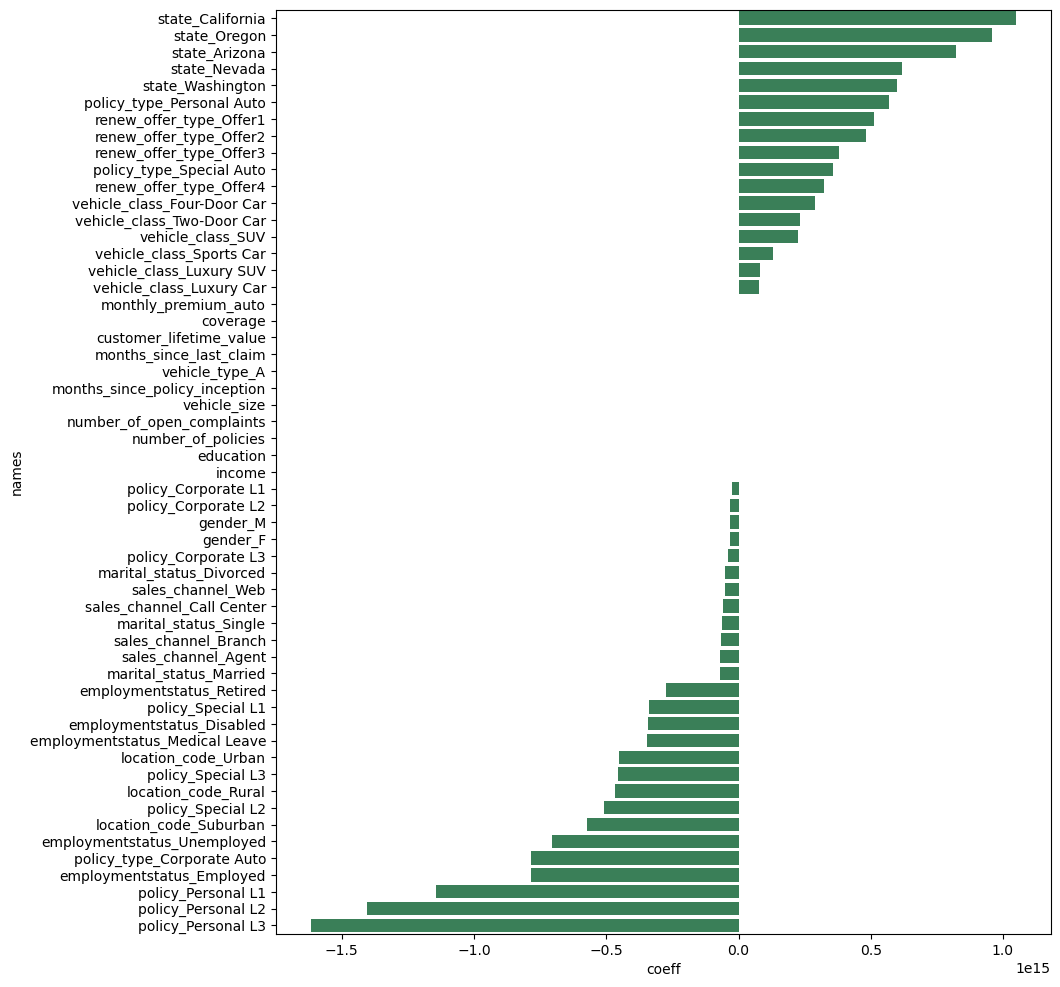

In [698]:
# fi_test = fi[fi['coeff'] == 0.00000000e+00]

# fi_sorted = fi[fi['coeff'] != 0]


fi_sorted = fi.sort_values(by='coeff', ascending=False)


plt.figure(figsize=(10,12))
sns.barplot(y = fi_sorted['names'], x= fi_sorted['coeff'], color='seagreen')

In [699]:
fi.sort_values(by='coeff', ascending=False)

,names,coeff
4,state_California,1.047531e+15
6,state_Oregon,9.580218e+14
3,state_Arizona,8.226899e+14
5,state_Nevada,6.183532e+14
7,state_Washington,5.990407e+14
22,policy_type_Personal Auto,5.675029e+14
33,renew_offer_type_Offer1,5.108537e+14
34,renew_offer_type_Offer2,4.838748e+14
35,renew_offer_type_Offer3,3.808589e+14
23,policy_type_Special Auto,3.556653e+14
